In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
data = 'https://raw.githubusercontent.com/alexeygrigorev/mlbookcamp-code/master/chapter-03-churn-prediction/WA_Fn-UseC_-Telco-Customer-Churn.csv'

In [3]:
# this is to pull the variable data and output it into our dir as data week 3
!wget $data -O data-week-3.csv

--2025-11-22 20:09:50--  https://raw.githubusercontent.com/alexeygrigorev/mlbookcamp-code/master/chapter-03-churn-prediction/WA_Fn-UseC_-Telco-Customer-Churn.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.109.133, 185.199.110.133, 185.199.111.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.109.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 977501 (955K) [text/plain]
Saving to: ‘data-week-3.csv’

data-week-3.csv     100%[===================>] 954.59K  --.-KB/s    in 0.007s  

2025-11-22 20:09:50 (135 MB/s) - ‘data-week-3.csv’ saved [977501/977501]



In [4]:
df = pd.read_csv('data-week-3.csv')
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [5]:
# to look at all columns at the same time I do .T to transpose it like numpy
df.head().T

,0,1,2,3,4
customerID,7590-VHVEG,5575-GNVDE,3668-QPYBK,7795-CFOCW,9237-HQITU
gender,Female,Male,Male,Male,Female
SeniorCitizen,0,0,0,0,0
Partner,Yes,No,No,No,No
Dependents,No,No,No,No,No
tenure,1,34,2,45,2
PhoneService,No,Yes,Yes,No,Yes
MultipleLines,No phone service,No,No,No phone service,No
InternetService,DSL,DSL,DSL,DSL,Fiber optic
OnlineSecurity,No,Yes,Yes,Yes,No


In [6]:
df.columns = df.columns.str.lower().str.replace(' ','_')

# categorical_columns = df.select_dtypes(include='object').columns.tolist() #SPYROS WAY, requires you to memorize more cmds

categorical_columns = list(df.dtypes[df.dtypes=='object'].index) #alexey, requires logic and understadning masks hehe


for c in categorical_columns:
    df[c] = df[c].str.lower().str.replace(' ', '_')

df.dtypes

customerid           object
gender               object
seniorcitizen         int64
partner              object
dependents           object
tenure                int64
phoneservice         object
multiplelines        object
internetservice      object
onlinesecurity       object
onlinebackup         object
deviceprotection     object
techsupport          object
streamingtv          object
streamingmovies      object
contract             object
paperlessbilling     object
paymentmethod        object
monthlycharges      float64
totalcharges         object
churn                object
dtype: object

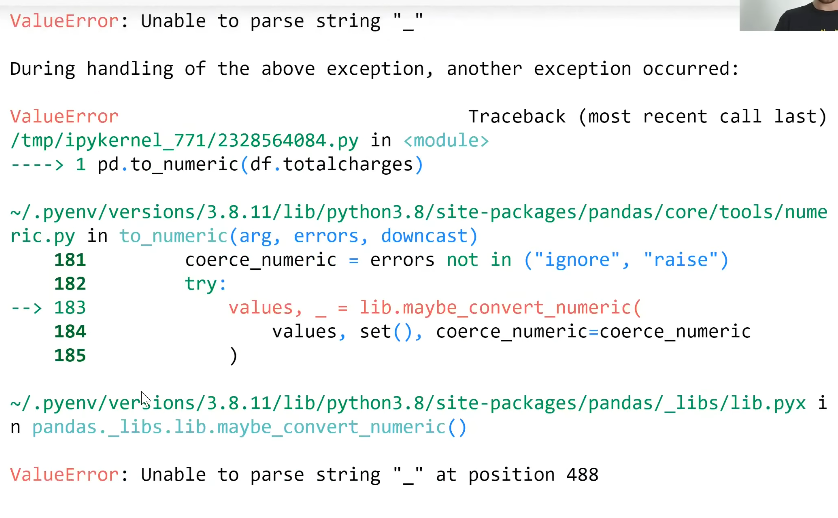

This because it was an empty space for missing value and we replaced spaces with underscores so here we are

In [7]:
tc = pd.to_numeric(df.totalcharges, errors='coerce') #ok go ahead and replace these weird occurences with nan

In [8]:
tc.isnull().sum()

np.int64(11)

In [9]:
df[tc.isnull()]

,customerid,gender,seniorcitizen,partner,dependents,tenure,phoneservice,multiplelines,internetservice,onlinesecurity,...,deviceprotection,techsupport,streamingtv,streamingmovies,contract,paperlessbilling,paymentmethod,monthlycharges,totalcharges,churn
488,4472-lvygi,female,0,yes,yes,0,no,no_phone_service,dsl,yes,...,yes,yes,yes,no,two_year,yes,bank_transfer_(automatic),52.55,_,no
753,3115-czmzd,male,0,no,yes,0,yes,no,no,no_internet_service,...,no_internet_service,no_internet_service,no_internet_service,no_internet_service,two_year,no,mailed_check,20.25,_,no
936,5709-lvoeq,female,0,yes,yes,0,yes,no,dsl,yes,...,yes,no,yes,yes,two_year,no,mailed_check,80.85,_,no
1082,4367-nuyao,male,0,yes,yes,0,yes,yes,no,no_internet_service,...,no_internet_service,no_internet_service,no_internet_service,no_internet_service,two_year,no,mailed_check,25.75,_,no
1340,1371-dwpaz,female,0,yes,yes,0,no,no_phone_service,dsl,yes,...,yes,yes,yes,no,two_year,no,credit_card_(automatic),56.05,_,no
3331,7644-omvmy,male,0,yes,yes,0,yes,no,no,no_internet_service,...,no_internet_service,no_internet_service,no_internet_service,no_internet_service,two_year,no,mailed_check,19.85,_,no
3826,3213-vvolg,male,0,yes,yes,0,yes,yes,no,no_internet_service,...,no_internet_service,no_internet_service,no_internet_service,no_internet_service,two_year,no,mailed_check,25.35,_,no
4380,2520-sgtta,female,0,yes,yes,0,yes,no,no,no_internet_service,...,no_internet_service,no_internet_service,no_internet_service,no_internet_service,two_year,no,mailed_check,20.00,_,no
5218,2923-arzlg,male,0,yes,yes,0,yes,no,no,no_internet_service,...,no_internet_service,no_internet_service,no_internet_service,no_internet_service,one_year,yes,mailed_check,19.70,_,no
6670,4075-wkniu,female,0,yes,yes,0,yes,yes,dsl,no,...,yes,yes,yes,no,two_year,no,mailed_check,73.35,_,no


In [10]:
df[tc.isnull()][['customerid','totalcharges']] #as you can see the column is missing, in prev versions of python it was a lot more evident 

,customerid,totalcharges
488,4472-lvygi,_
753,3115-czmzd,_
936,5709-lvoeq,_
1082,4367-nuyao,_
1340,1371-dwpaz,_
3331,7644-omvmy,_
3826,3213-vvolg,_
4380,2520-sgtta,_
5218,2923-arzlg,_
6670,4075-wkniu,_


This quite obvious in his code

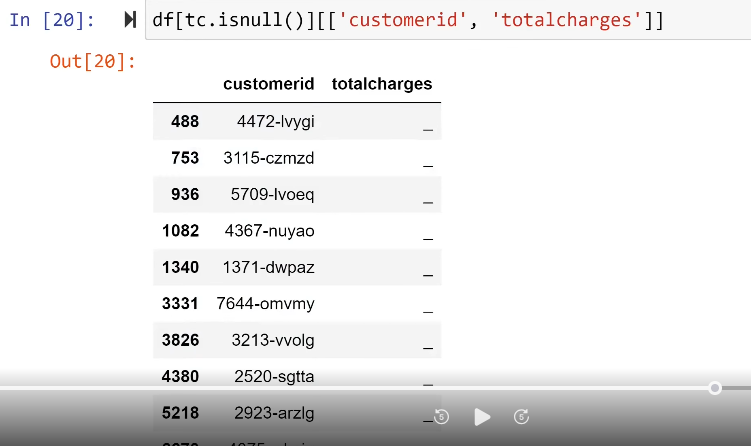


In [11]:
type(df[tc.isnull()][['customerid','totalcharges']]) #just me effin round to learn how to manip df

pandas.core.frame.DataFrame

In [12]:
df[tc.isnull()][['customerid','totalcharges']]['customerid'] #just me effin round to learn how to manip df

488     4472-lvygi
753     3115-czmzd
936     5709-lvoeq
1082    4367-nuyao
1340    1371-dwpaz
3331    7644-omvmy
3826    3213-vvolg
4380    2520-sgtta
5218    2923-arzlg
6670    4075-wkniu
6754    2775-sefee
Name: customerid, dtype: object

In [13]:
type(df[tc.isnull()][['customerid','totalcharges']]['customerid']) #just me effin round to learn how to manip df

pandas.core.series.Series

In [14]:
df[tc.isnull()][['customerid','totalcharges']]['customerid'].index #just me effin round to learn how to manip df

Index([488, 753, 936, 1082, 1340, 3331, 3826, 4380, 5218, 6670, 6754], dtype='int64')

In [15]:
type(df[tc.isnull()][['customerid','totalcharges']]['customerid'].index) #just me effin round to learn how to manip df

pandas.core.indexes.base.Index

In [16]:
list(df[tc.isnull()][['customerid','totalcharges']]['customerid'].index) #just me effin round to learn how to manip df

[488, 753, 936, 1082, 1340, 3331, 3826, 4380, 5218, 6670, 6754]

In [17]:
type(list(df[tc.isnull()][['customerid','totalcharges']]['customerid'].index)) #just me effin round to learn how to manip df

list

In [18]:
df.totalcharges = pd.to_numeric(df.totalcharges, errors='coerce')

In [19]:
df.totalcharges = df.totalcharges.fillna(0)

In [20]:
df.churn #we need to convert this to numbers

0        no
1        no
2       yes
3        no
4       yes
       ... 
7038     no
7039     no
7040     no
7041    yes
7042     no
Name: churn, Length: 7043, dtype: object

In [21]:
df.churn == 'yes'

0       False
1       False
2        True
3       False
4        True
        ...  
7038    False
7039    False
7040    False
7041     True
7042    False
Name: churn, Length: 7043, dtype: bool

In [22]:
(df.churn == 'yes').astype(int) 

0       0
1       0
2       1
3       0
4       1
       ..
7038    0
7039    0
7040    0
7041    1
7042    0
Name: churn, Length: 7043, dtype: int64

In [23]:
df.churn = (df.churn == 'yes').astype(int) #take all yes as 1 (true) else 0 (false)

In [24]:
from sklearn.model_selection import train_test_split

In [25]:
df_full_train, df_test = train_test_split(df, test_size=0.2, random_state=1) #only two parts here

In [26]:
len(df_full_train), len(df_test)

(5634, 1409)

only problem here being that this is the 20% of the smaller data set not the original 
Using some shortcut arithmetic here we revert to thinking about percentages as a normalization that results in 20units of something over 100units initially:

$$\frac{20}{100}$$

When we do the split the proportion is no longer 20units over 100units, but is reduced to 20units over 80units, so we express it as such and doing the cancelation get a quarter, as this is the number of records that corresponds to 20% of the total number of records.

$$\frac{20}{80} = \frac{1}{4}=0.25$$

In [27]:
df_train, df_val = train_test_split(df, test_size=0.25, random_state=1) #only two parts here

In [28]:
len(df_train), len(df_val), len(df_test)

(5282, 1761, 1409)

In [29]:
df_train.reset_index(drop=True)
df_val.reset_index(drop=True)
df_test.reset_index(drop=True)

,customerid,gender,seniorcitizen,partner,dependents,tenure,phoneservice,multiplelines,internetservice,onlinesecurity,...,deviceprotection,techsupport,streamingtv,streamingmovies,contract,paperlessbilling,paymentmethod,monthlycharges,totalcharges,churn
0,8879-zkjof,female,0,no,no,41,yes,no,dsl,yes,...,yes,yes,yes,yes,one_year,yes,bank_transfer_(automatic),79.85,3320.75,0
1,0201-mibol,female,1,no,no,66,yes,yes,fiber_optic,yes,...,no,no,yes,yes,two_year,yes,bank_transfer_(automatic),102.40,6471.85,0
2,1600-dilpe,female,0,no,no,12,yes,no,dsl,no,...,no,no,no,no,month-to-month,yes,bank_transfer_(automatic),45.00,524.35,0
3,8601-qacrs,female,0,no,no,5,yes,yes,dsl,no,...,no,no,no,no,month-to-month,yes,mailed_check,50.60,249.95,1
4,7919-zodzz,female,0,yes,yes,10,yes,no,dsl,no,...,yes,no,no,yes,one_year,yes,mailed_check,65.90,660.05,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1404,5130-iekqt,male,1,no,no,25,yes,yes,fiber_optic,no,...,yes,no,yes,yes,month-to-month,no,mailed_check,105.95,2655.25,1
1405,4452-rohmo,female,0,no,no,15,yes,no,no,no_internet_service,...,no_internet_service,no_internet_service,no_internet_service,no_internet_service,two_year,no,mailed_check,19.60,331.60,0
1406,6164-haqtx,male,0,no,no,71,no,no_phone_service,dsl,yes,...,yes,yes,yes,no,two_year,no,bank_transfer_(automatic),53.95,3888.65,0
1407,3982-dqlus,male,1,yes,yes,65,yes,yes,fiber_optic,yes,...,no,no,no,no,month-to-month,yes,electronic_check,85.75,5688.45,0


In [30]:
y_train = df_train.churn.values
y_val = df_val.churn.values
y_test = df_test.churn.values

In [31]:
del df_train['churn']
del df_val['churn']
del df_test['churn']

In [32]:
df_full_train = df_full_train.reset_index(drop=True)

In [33]:
df_full_train

,customerid,gender,seniorcitizen,partner,dependents,tenure,phoneservice,multiplelines,internetservice,onlinesecurity,...,deviceprotection,techsupport,streamingtv,streamingmovies,contract,paperlessbilling,paymentmethod,monthlycharges,totalcharges,churn
0,5442-pptjy,male,0,yes,yes,12,yes,no,no,no_internet_service,...,no_internet_service,no_internet_service,no_internet_service,no_internet_service,two_year,no,mailed_check,19.70,258.35,0
1,6261-rcvns,female,0,no,no,42,yes,no,dsl,yes,...,yes,yes,no,yes,one_year,no,credit_card_(automatic),73.90,3160.55,1
2,2176-osjuv,male,0,yes,no,71,yes,yes,dsl,yes,...,no,yes,no,no,two_year,no,bank_transfer_(automatic),65.15,4681.75,0
3,6161-erdgd,male,0,yes,yes,71,yes,yes,dsl,yes,...,yes,yes,yes,yes,one_year,no,electronic_check,85.45,6300.85,0
4,2364-ufrom,male,0,no,no,30,yes,no,dsl,yes,...,no,yes,yes,no,one_year,no,electronic_check,70.40,2044.75,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5629,0781-lkxbr,male,1,no,no,9,yes,yes,fiber_optic,no,...,yes,no,yes,yes,month-to-month,yes,electronic_check,100.50,918.60,1
5630,3507-gasnp,male,0,no,yes,60,yes,no,no,no_internet_service,...,no_internet_service,no_internet_service,no_internet_service,no_internet_service,two_year,no,mailed_check,19.95,1189.90,0
5631,8868-wozgu,male,0,no,no,28,yes,yes,fiber_optic,no,...,yes,no,yes,yes,month-to-month,yes,electronic_check,105.70,2979.50,1
5632,1251-krreg,male,0,no,no,2,yes,yes,dsl,no,...,no,no,no,no,month-to-month,yes,mailed_check,54.40,114.10,1


In [34]:
df_full_train.isnull().sum()

customerid          0
gender              0
seniorcitizen       0
partner             0
dependents          0
tenure              0
phoneservice        0
multiplelines       0
internetservice     0
onlinesecurity      0
onlinebackup        0
deviceprotection    0
techsupport         0
streamingtv         0
streamingmovies     0
contract            0
paperlessbilling    0
paymentmethod       0
monthlycharges      0
totalcharges        0
churn               0
dtype: int64

In [35]:
#we look at the distro of our target variable.
df_full_train.churn.value_counts() 

churn
0    4113
1    1521
Name: count, dtype: int64

In [36]:
#we look at the distro of our target variable.
df_full_train.churn.value_counts(normalize=True) 

churn
0    0.730032
1    0.269968
Name: proportion, dtype: float64

In [37]:
df_full_train.churn.mean()

np.float64(0.26996805111821087)

In [38]:
global_churn_rate = df_full_train.churn.mean()
round(global_churn_rate, 2)

np.float64(0.27)

In [39]:
df_full_train.dtypes

customerid           object
gender               object
seniorcitizen         int64
partner              object
dependents           object
tenure                int64
phoneservice         object
multiplelines        object
internetservice      object
onlinesecurity       object
onlinebackup         object
deviceprotection     object
techsupport          object
streamingtv          object
streamingmovies      object
contract             object
paperlessbilling     object
paymentmethod        object
monthlycharges      float64
totalcharges        float64
churn                 int64
dtype: object

In [40]:
numerical = ['tenure', 'monthlycharges', 'totalcharges']
numerical

['tenure', 'monthlycharges', 'totalcharges']

In [41]:
df_full_train.columns

Index(['customerid', 'gender', 'seniorcitizen', 'partner', 'dependents',
       'tenure', 'phoneservice', 'multiplelines', 'internetservice',
       'onlinesecurity', 'onlinebackup', 'deviceprotection', 'techsupport',
       'streamingtv', 'streamingmovies', 'contract', 'paperlessbilling',
       'paymentmethod', 'monthlycharges', 'totalcharges', 'churn'],
      dtype='object')

In [47]:
categorical =[
    'gender', 'seniorcitizen', 'partner', 'dependents',
       'phoneservice', 'multiplelines', 'internetservice',
       'onlinesecurity', 'onlinebackup', 'deviceprotection', 'techsupport',
       'streamingtv', 'streamingmovies', 'contract', 'paperlessbilling',
       'paymentmethod'
] #rest are categorical except customer id which is more an identifier of user 
categorical

['gender',
 'seniorcitizen',
 'partner',
 'dependents',
 'phoneservice',
 'multiplelines',
 'internetservice',
 'onlinesecurity',
 'onlinebackup',
 'deviceprotection',
 'techsupport',
 'streamingtv',
 'streamingmovies',
 'contract',
 'paperlessbilling',
 'paymentmethod']

In [48]:
df_full_train[categorical].nunique() #number of unique values 

gender              2
seniorcitizen       2
partner             2
dependents          2
phoneservice        2
multiplelines       3
internetservice     3
onlinesecurity      3
onlinebackup        3
deviceprotection    3
techsupport         3
streamingtv         3
streamingmovies     3
contract            3
paperlessbilling    2
paymentmethod       4
dtype: int64

In [50]:
# churn rate within each group
churn_female = df_full_train[df_full_train.gender == 'female'].churn.mean()
churn_female

np.float64(0.27682403433476394)

In [51]:
churn_male = df_full_train[df_full_train.gender == 'male'].churn.mean()
churn_male

np.float64(0.2632135306553911)

In [62]:
global_churn_rate - churn_male

np.float64(0.006754520462819769)

In [52]:
df_full_train.partner.value_counts()

partner
no     2932
yes    2702
Name: count, dtype: int64

In [57]:
churn_partner = df_full_train[df_full_train.partner == 'yes'].churn.mean()
churn_partner

np.float64(0.20503330866025166)

In [58]:
churn_no_partner = df_full_train[df_full_train.partner == 'no'].churn.mean()
churn_no_partner

np.float64(0.3298090040927694)

In [63]:
global_churn_rate - churn_partner #the difference is big so this could be a good predictor of churn

np.float64(0.06493474245795922)

In [64]:
global_churn_rate - churn_no_partner

np.float64(-0.05984095297455855)